In [1]:
#import torch
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
#from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats

## Time-resolved sg clusters analyse

In [2]:
sg_time_proteins = pd.read_csv("./SG_proteome_time.csv")
sg_time_proteins

sg_time_dict = sg_time_proteins.set_index(['uniprot']).to_dict()['Time']

In [3]:
g3bp1_dict = pd.read_csv("../data/g3bp1_cossim.csv")
g3bp1_dict['2'] = [i.replace('Q13283','') for i in g3bp1_dict['2']]
g3bp1_dict = g3bp1_dict.set_index(['2']).to_dict()['mean.cos.sim']

In [4]:
g3bp1_dict['Q13283'] = 1

In [239]:
sg_clusters = weighted_enrich_df[weighted_enrich_df['FDR Stress granule']< 0.05].iloc[:,:15]

for t in ['Early','Late','Invariable']:
    sg_clusters[t] = [[sg_time_dict[k] if k in sg_time_dict.keys() else '_' for k in i.split(' ') ].count(t)/len(i.split(' ')) for i in sg_clusters['Members'].tolist()]

In [317]:
sg_clusters_with_time = sg_clusters[(sg_clusters['Early']>=0.3)|(sg_clusters['Late']>=0.3)|(sg_clusters['Invariable']>=0.3)]

In [318]:
len(sg_clusters_with_time)

16

In [5]:
sg_clusters = pd.read_table("sg_temp.txt",sep='	')
sg_clusters

,Cluster,Size,Density,Internal weight,External weight,Quality,P-value,Members,FDR PS proteins,Frac PS proteins,Entry,Gene Name,Label,mean_SaPS,mean_PdPS,Early,Late,Invariable,G3BP1_mean_cossim
0,277,191,0.3000,5444.000,7175.00,0.41870,0.000000,Q53T94 P62829 O43159 P61313 Q68D10 O15479 P608...,9.970000e-51,0.759162,Q5SSJ5,HP1BP3,HP1BP3_1(191),0.469406,0.629711,0.361257,0.015707,0.031414,0.653888
1,308,14,0.3064,27.880,311.90,0.07580,0.999690,Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...,6.260170e-04,0.785714,P22626,HNRNPA2B1,HNRNPA2B1(14),0.759923,0.774339,0.642857,0.000000,0.000000,0.698731
2,374,16,0.3598,43.170,198.70,0.15760,0.953244,O75821 O15372 P60842 O00303 O15371 Q9Y262 Q7L2...,4.911401e-02,0.562500,O75821,EIF3G,EIF3G(16),0.495707,0.549203,0.000000,0.312500,0.187500,0.515445
3,411,6,0.3726,5.589,67.84,0.06543,0.989880,Q8NCA5 Q8WWM7 Q99700 Q3MHD2 P00813 Q9BUT9,1.952822e-01,0.666667,Q8WWM7,ATXN2L,ATXN2L(6),0.642298,0.613377,0.166667,0.000000,0.333333,0.646075
4,488,16,0.3041,36.490,287.60,0.10250,0.999965,Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...,5.140000e-07,0.937500,P22626,HNRNPA2B1,HNRNPA2B1_1(16),0.848726,0.828685,0.625000,0.000000,0.000000,0.703754
5,590,12,0.3044,20.090,231.40,0.07293,0.999846,O95433 Q96D46 P22314 P41252 P08243 P27708 P078...,8.810641e-02,0.583333,Q8WW22,DNAJA4,DNAJA4(12),0.233283,0.483069,0.000000,0.333333,0.000000,0.447438
6,719,12,0.3156,20.830,176.80,0.09400,0.998225,O14893 Q9UHI6 P57678 Q8TEQ6 P83369 Q16637 Q8WX...,8.810641e-02,0.583333,Q7Z422,SZRD1,SZRD1(12),0.416215,0.553427,0.000000,0.000000,0.333333,0.478544
7,721,9,0.3039,10.940,178.30,0.05279,0.999853,Q99700 O43390 O43143 Q5VWX1 Q9Y5E9 Q07666 O755...,2.109341e-01,0.555556,Q07666,KHDRBS1,KHDRBS1(9),0.521900,0.488595,0.333333,0.000000,0.111111,0.649768
8,838,16,0.3177,38.130,307.90,0.10090,0.999987,P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...,1.090000e-08,1.000000,P22626,HNRNPA2B1,HNRNPA2B1_2(16),0.918141,0.882645,0.562500,0.125000,0.000000,0.732395
9,948,7,0.3196,6.712,105.40,0.05323,0.999299,Q8N684 Q8IVL5 O43809 Q92945 Q9HBH9 Q16630 Q8N1G4,8.810641e-02,0.714286,Q16630,CPSF6,CPSF6(7),0.437400,0.568152,0.428571,0.000000,0.000000,0.665019


PearsonRResult(statistic=-0.7119038652911154, pvalue=0.0042893453235006394)


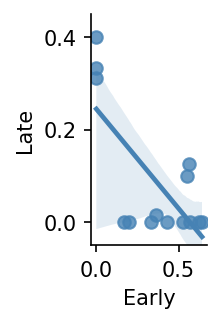

In [ ]:
plt.figure(figsize=(1, 2),dpi = 150)

sg_clusters1 = sg_clusters[(sg_clusters['Early']!=0)|(sg_clusters['Late']!=0)]
print(stats.pearsonr(sg_clusters1['Early'].tolist(),sg_clusters1['Late'].tolist()))

sns.regplot(data=sg_clusters1,x='Early',y='Late',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()

PearsonRResult(statistic=-0.8595264034881385, pvalue=8.139657898886132e-05)


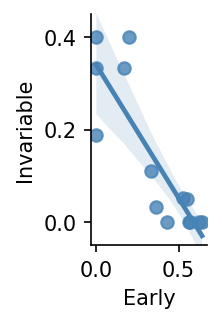

In [ ]:
plt.figure(figsize=(1, 2),dpi = 150)

sg_clusters1 = sg_clusters[(sg_clusters['Early']!=0)|(sg_clusters['Invariable']!=0)]
print(stats.pearsonr(sg_clusters1['Early'].tolist(),sg_clusters1['Invariable'].tolist()))
sns.regplot(data=sg_clusters1,x='Early',y='Invariable',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()

PearsonRResult(statistic=-0.5067691457513414, pvalue=0.09267848824161397)


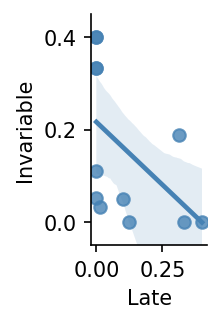

In [ ]:
plt.figure(figsize=(1, 2),dpi = 150)

sg_clusters1 = sg_clusters[(sg_clusters['Late']!=0)|(sg_clusters['Invariable']!=0)]
print(stats.pearsonr(sg_clusters1['Late'].tolist(),sg_clusters1['Invariable'].tolist()))
sns.regplot(data=sg_clusters1,x='Late',y='Invariable',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()

In [3]:
early_clusters = ['HNRNPA2B1(14)','HNRNPA2B1_1(16)','HNRNPA2B1_5(14)','HNRNPA2B1_2(16)','HNRNPA2B1_4(20)','HNRNPA2B1_3(19)','CPSF6(7)','HP1BP3_1(191)','KHDRBS1(9)']
late_clusters = ['EIF4G1(5)','DNAJA4(12)','EIF3G(16)']
innv_clusters = ['USP10(5)','GIGYF2(5)','ATXN2L(6)','SZRD1(12)']

In [4]:
cluster_order  = innv_clusters+early_clusters+late_clusters

In [8]:
sg_clusters = sg_clusters.set_index(['Label']).loc[cluster_order,:]

In [9]:
sg_clusters

,Cluster,Size,Density,Internal weight,External weight,Quality,P-value,Members,FDR PS proteins,Frac PS proteins,Entry,Gene Name,mean_SaPS,mean_PdPS,Early,Late,Invariable,G3BP1_mean_cossim
Label,,,,,,,,,,,,,,,,,,
USP10(5),1110,5,0.3210,3.210,54.53,0.04739,0.996692,Q9UN86 Q13283 Q5TZA2 Q14694 P30566,3.461064e-01,0.600000,Q14694,USP10,0.556417,0.578404,0.200000,0.000000,0.400000,0.664559
GIGYF2(5),1278,5,0.3210,3.210,57.76,0.04524,0.996692,Q13542 Q86W56 O75420 O60573 Q6Y7W6,9.834143e-02,0.800000,Q6Y7W6,GIGYF2,0.572010,0.636370,0.000000,0.000000,0.400000,0.597580
ATXN2L(6),411,6,0.3726,5.589,67.84,0.06543,0.989880,Q8NCA5 Q8WWM7 Q99700 Q3MHD2 P00813 Q9BUT9,1.952822e-01,0.666667,Q8WWM7,ATXN2L,0.642298,0.613377,0.166667,0.000000,0.333333,0.646075
SZRD1(12),719,12,0.3156,20.830,176.80,0.09400,0.998225,O14893 Q9UHI6 P57678 Q8TEQ6 P83369 Q16637 Q8WX...,8.810641e-02,0.583333,Q7Z422,SZRD1,0.416215,0.553427,0.000000,0.000000,0.333333,0.478544
HNRNPA2B1(14),308,14,0.3064,27.880,311.90,0.07580,0.999690,Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...,6.260170e-04,0.785714,P22626,HNRNPA2B1,0.759923,0.774339,0.642857,0.000000,0.000000,0.698731
HNRNPA2B1_1(16),488,16,0.3041,36.490,287.60,0.10250,0.999965,Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...,5.140000e-07,0.937500,P22626,HNRNPA2B1,0.848726,0.828685,0.625000,0.000000,0.000000,0.703754
HNRNPA2B1_5(14),1653,14,0.3022,27.500,234.30,0.09490,0.997642,Q15424 O14979 P35637 P52272 P55795 P22626 P519...,6.260170e-04,0.785714,P22626,HNRNPA2B1,0.762995,0.734653,0.571429,0.000000,0.000000,0.694647
HNRNPA2B1_2(16),838,16,0.3177,38.130,307.90,0.10090,0.999987,P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...,1.090000e-08,1.000000,P22626,HNRNPA2B1,0.918141,0.882645,0.562500,0.125000,0.000000,0.732395
HNRNPA2B1_4(20),1616,20,0.3025,57.480,453.30,0.10440,0.999900,P09651 P23246 Q15424 Q14151 O14979 P35637 Q5T4...,2.290000e-09,0.950000,P22626,HNRNPA2B1,0.859757,0.839673,0.550000,0.100000,0.050000,0.717531


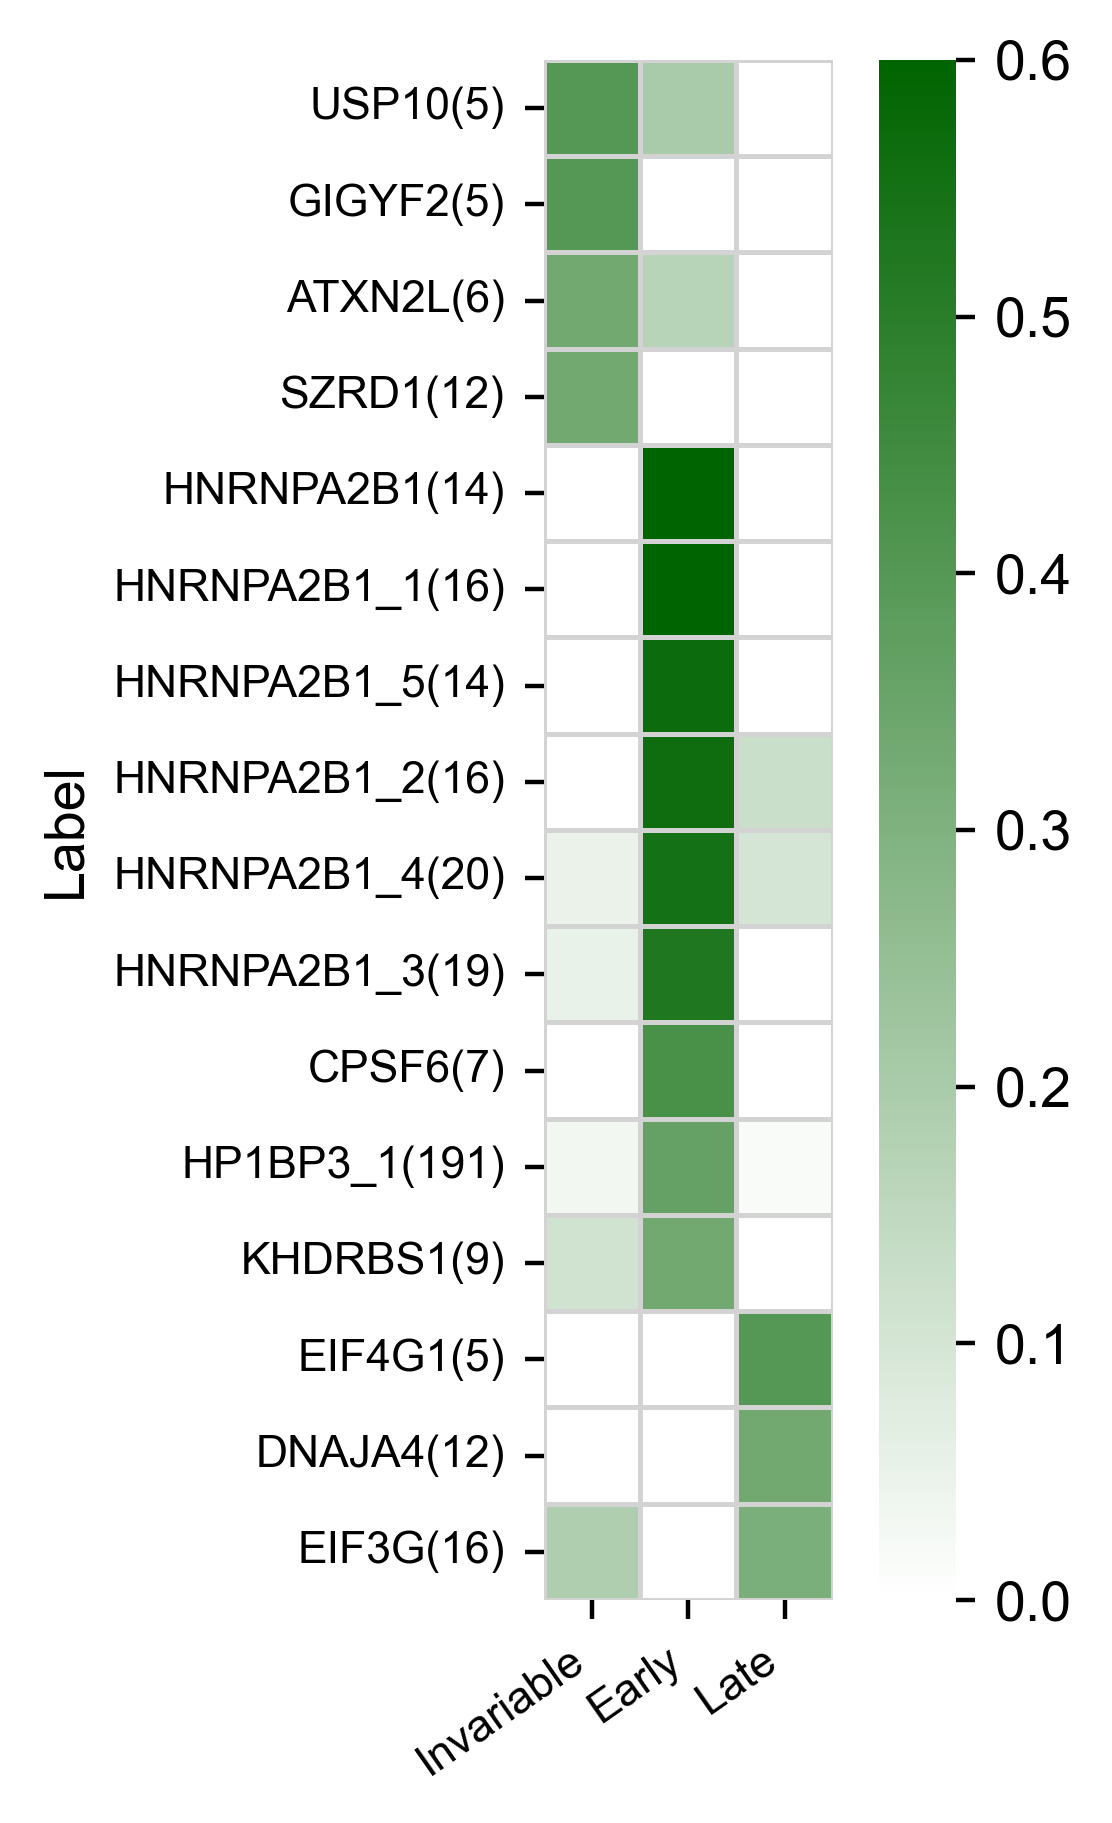

In [ ]:
#Time-resolved fraction
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "darkgreen"])
plt.figure(figsize=(3, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(sg_clusters.loc[:,['Invariable','Early','Late']].fillna(0), cmap = my_colormap1, annot = False, 
            vmin=0,vmax = 0.6, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')


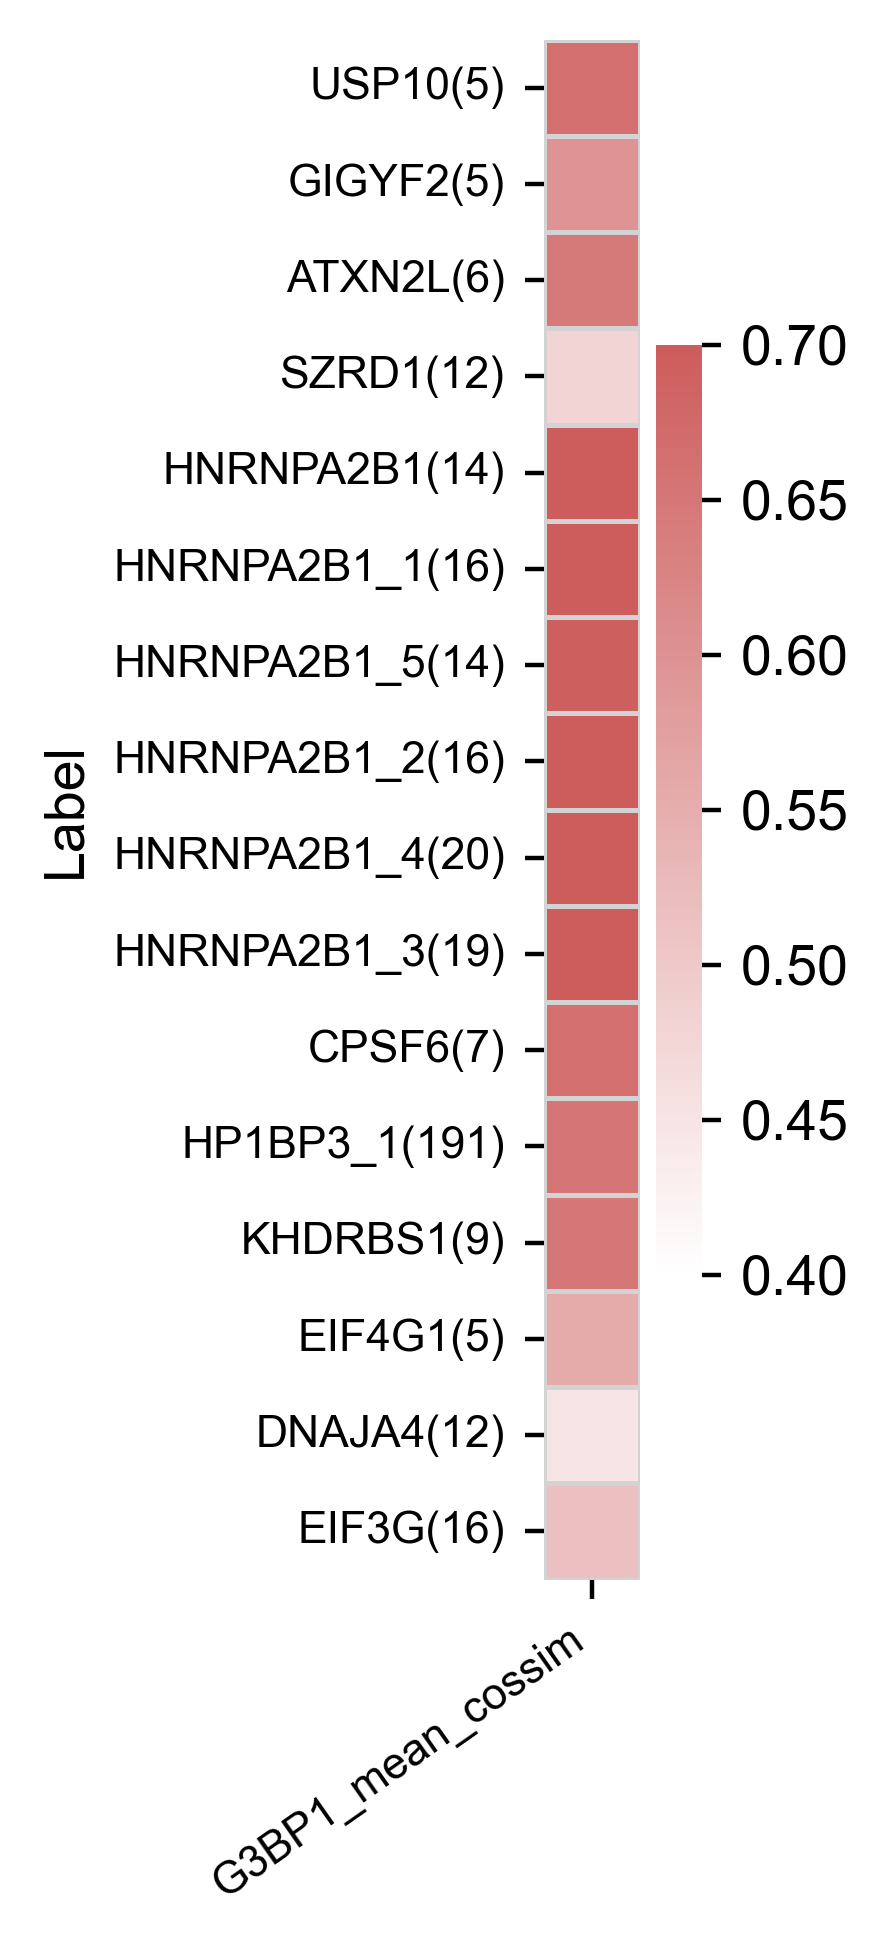

In [ ]:
#G3BP1 cos.sim
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "indianred"])
plt.figure(figsize=(1, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(sg_clusters.loc[:,['G3BP1_mean_cossim']].fillna(0), cmap = my_colormap1, annot = False, 
            vmin=0.4,vmax = 0.7, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')


In [337]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[:9],sg_clusters['G3BP1_mean_cossim'].tolist()[9:13])

MannwhitneyuResult(statistic=34.0, pvalue=0.011188811188811189)

In [338]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[:9],sg_clusters['G3BP1_mean_cossim'].tolist()[13:16])

MannwhitneyuResult(statistic=27.0, pvalue=0.00909090909090909)

In [339]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[9:13],sg_clusters['G3BP1_mean_cossim'].tolist()[13:16])

MannwhitneyuResult(statistic=10.0, pvalue=0.22857142857142856)

In [7]:
sg_clusters['class'] = ['Early']*9+['Invariable']*4+['Late']*3

C:\Users\wqswx\AppData\Local\Temp\ipykernel_15872\3665667448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sg_clusters,x='class',y='G3BP1_mean_cossim',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)


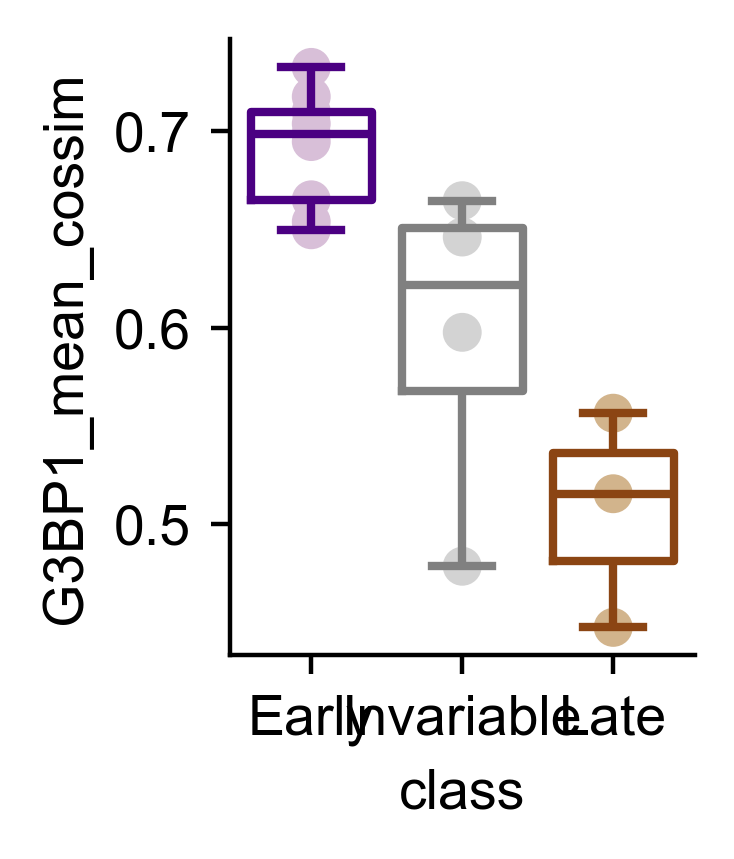

In [ ]:
plt.figure(figsize=(1.5, 2),dpi = 400)

sns.boxplot(data=sg_clusters,x='class',y='G3BP1_mean_cossim',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)
plt.scatter(data=sg_clusters,x='class',y='G3BP1_mean_cossim',color = ['thistle']*9+['lightgrey']*4+['tan']*3)

sns.despine()

In [26]:
import gseapy as gp

In [34]:
gene_background = list(set([uniprot_to_genename_dict[i] for i in genes if i in uniprot_to_genename_dict.keys()]))
len(gene_background)

15901

In [36]:
all_enrich = pd.DataFrame()

In [ ]:
for c in sg_clusters['Members'].tolist():
    protein_list = list(set([uniprot_to_genename_dict[p] for p in c.split(' ') if p in uniprot_to_genename_dict.keys()]))

    enrich_go = gp.enrichr(gene_list=protein_list,
                     gene_sets=['GO_Biological_Process_2023'],
                      organism='human', # organism argment is ignored because user input a background
                     background=gene_background,
                     outdir=None, # don't write to disk
                    ).results
    
    enrich_go['cluster'] = [c]*len(enrich_go)

    all_enrich = pd.concat([all_enrich,enrich_go])

In [41]:
all_enrich['cluster'] = all_enrich['cluster'].map(sg_clusters.set_index(['Members']).to_dict()['Label'])

In [42]:
all_enrich.head(2)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,cluster
0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),7.912269e-113,5.174624e-110,0,0,338.998387,87503.518298,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191)
1,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),2.886072e-93,9.437455e-91,0,0,102.842431,21913.718461,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191)


In [44]:
all_enrich.iloc[0,-1][:-1].split('(')[1]

'191'

In [45]:
all_enrich['Fraction'] = [len(all_enrich.iloc[i,-2].split(';'))/int(all_enrich.iloc[i,-1][:-1].split('(')[1]) for i in range(len(all_enrich))]

In [14]:
all_enrich = pd.read_csv("./SG_related_enrich.csv")
all_enrich

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,cluster,Fraction
0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),7.910000e-113,5.170000e-110,0,0,338.998387,87503.518300,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.350785
1,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),2.890000e-93,9.440000e-91,0,0,102.842431,21913.718460,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.356021
2,GO_Biological_Process_2023,Macromolecule Biosynthetic Process (GO:0009059),3.760000e-87,8.190000e-85,0,0,77.692229,15460.828020,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.356021
3,GO_Biological_Process_2023,Gene Expression (GO:0010467),5.880000e-81,9.620000e-79,0,0,46.458703,8582.673461,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPLP1;RPL34;R...,HP1BP3_1(191),0.387435
4,GO_Biological_Process_2023,Translation (GO:0006412),9.390000e-80,1.230000e-77,0,0,53.944634,9816.166357,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPLP1;RPL34;R...,HP1BP3_1(191),0.361257
...,...,...,...,...,...,...,...,...,...,...,...
1720,GO_Biological_Process_2023,Positive Regulation Of Protein Phosphorylation...,9.820027e-01,9.880245e-01,0,0,0.246823,0.004483,FGF3,HP1BP3_1(191),0.005236
1721,GO_Biological_Process_2023,Protein Localization (GO:0008104),9.834923e-01,9.880245e-01,0,0,0.241555,0.004021,NPM1,HP1BP3_1(191),0.005236
1722,GO_Biological_Process_2023,Cellular Response To Oxygen-Containing Compoun...,9.854099e-01,9.884327e-01,0,0,0.234401,0.003445,RPS3,HP1BP3_1(191),0.005236
1723,GO_Biological_Process_2023,Nervous System Development (GO:0007399),9.887455e-01,9.902597e-01,0,0,0.220650,0.002497,FGF13,HP1BP3_1(191),0.005236


In [15]:
go_plot = ['Regulation Of mRNA Polyadenylation',
           'tRNA Aminoacylation',
           'Cytoplasmic Translational Initiation',
           'Peptide Biosynthetic Process',
           'Negative Regulation Of Translation',
           'mRNA Processing',
           'Regulation Of RNA Metabolic Process',
           'RNA Metabolic Process',
           'Regulation Of mRNA Splicing, Via Spliceosome',
           'Regulation Of Stress Granule Assembly']

In [16]:
all_enrich['Term'] = [i.split('(')[0].strip(' ') for i in all_enrich['Term'].tolist()]
all_enrich['-log10(adjust.p)'] = -np.log10(all_enrich['Adjusted P-value'])

In [17]:
go_plot_df = pd.DataFrame(index=cluster_order,columns=go_plot)
for a in cluster_order:
    for b in go_plot:
        try:
            m = all_enrich[all_enrich['Term']==b]
            n = m[m['cluster']==a]
            go_plot_df.loc[a,b] = n['-log10(adjust.p)'].tolist()[0]
        except:
            go_plot_df.loc[a,b] = 0

In [18]:
all_enrich['Term'][0]

'Cytoplasmic Translation'

In [19]:
go_plot_df

,Regulation Of mRNA Polyadenylation,tRNA Aminoacylation,Cytoplasmic Translational Initiation,Peptide Biosynthetic Process,Negative Regulation Of Translation,mRNA Processing,Regulation Of RNA Metabolic Process,RNA Metabolic Process,"Regulation Of mRNA Splicing, Via Spliceosome",Regulation Of Stress Granule Assembly
USP10(5),0,0,0,0,0,0,0,0,0,8.136083
GIGYF2(5),0,0,0,1.276156,4.302771,0,0,0,0,0
ATXN2L(6),0,0,0,0,0,0,0,1.852098,0,0
SZRD1(12),0,0,0,0,0,3.716177,0,0.966532,0,0
HNRNPA2B1(14),0,0,0,0,0,7.943095,6.928118,3.220444,0.97896,0
HNRNPA2B1_1(16),0,0,0,0,0,4.316053,4.316053,1.598104,1.694999,0
HNRNPA2B1_5(14),0,0,0,0,0,4.512862,4.512862,0.925714,0.981242,0
HNRNPA2B1_2(16),0,0,0,0,0,4.293282,3.062877,3.008788,3.062877,0
HNRNPA2B1_4(20),0,0,0,0,0,6.931814,7.110138,2.615625,5.767004,0
HNRNPA2B1_3(19),0,0,0,0,0.822218,10.436519,11.264401,2.664745,2.854648,0


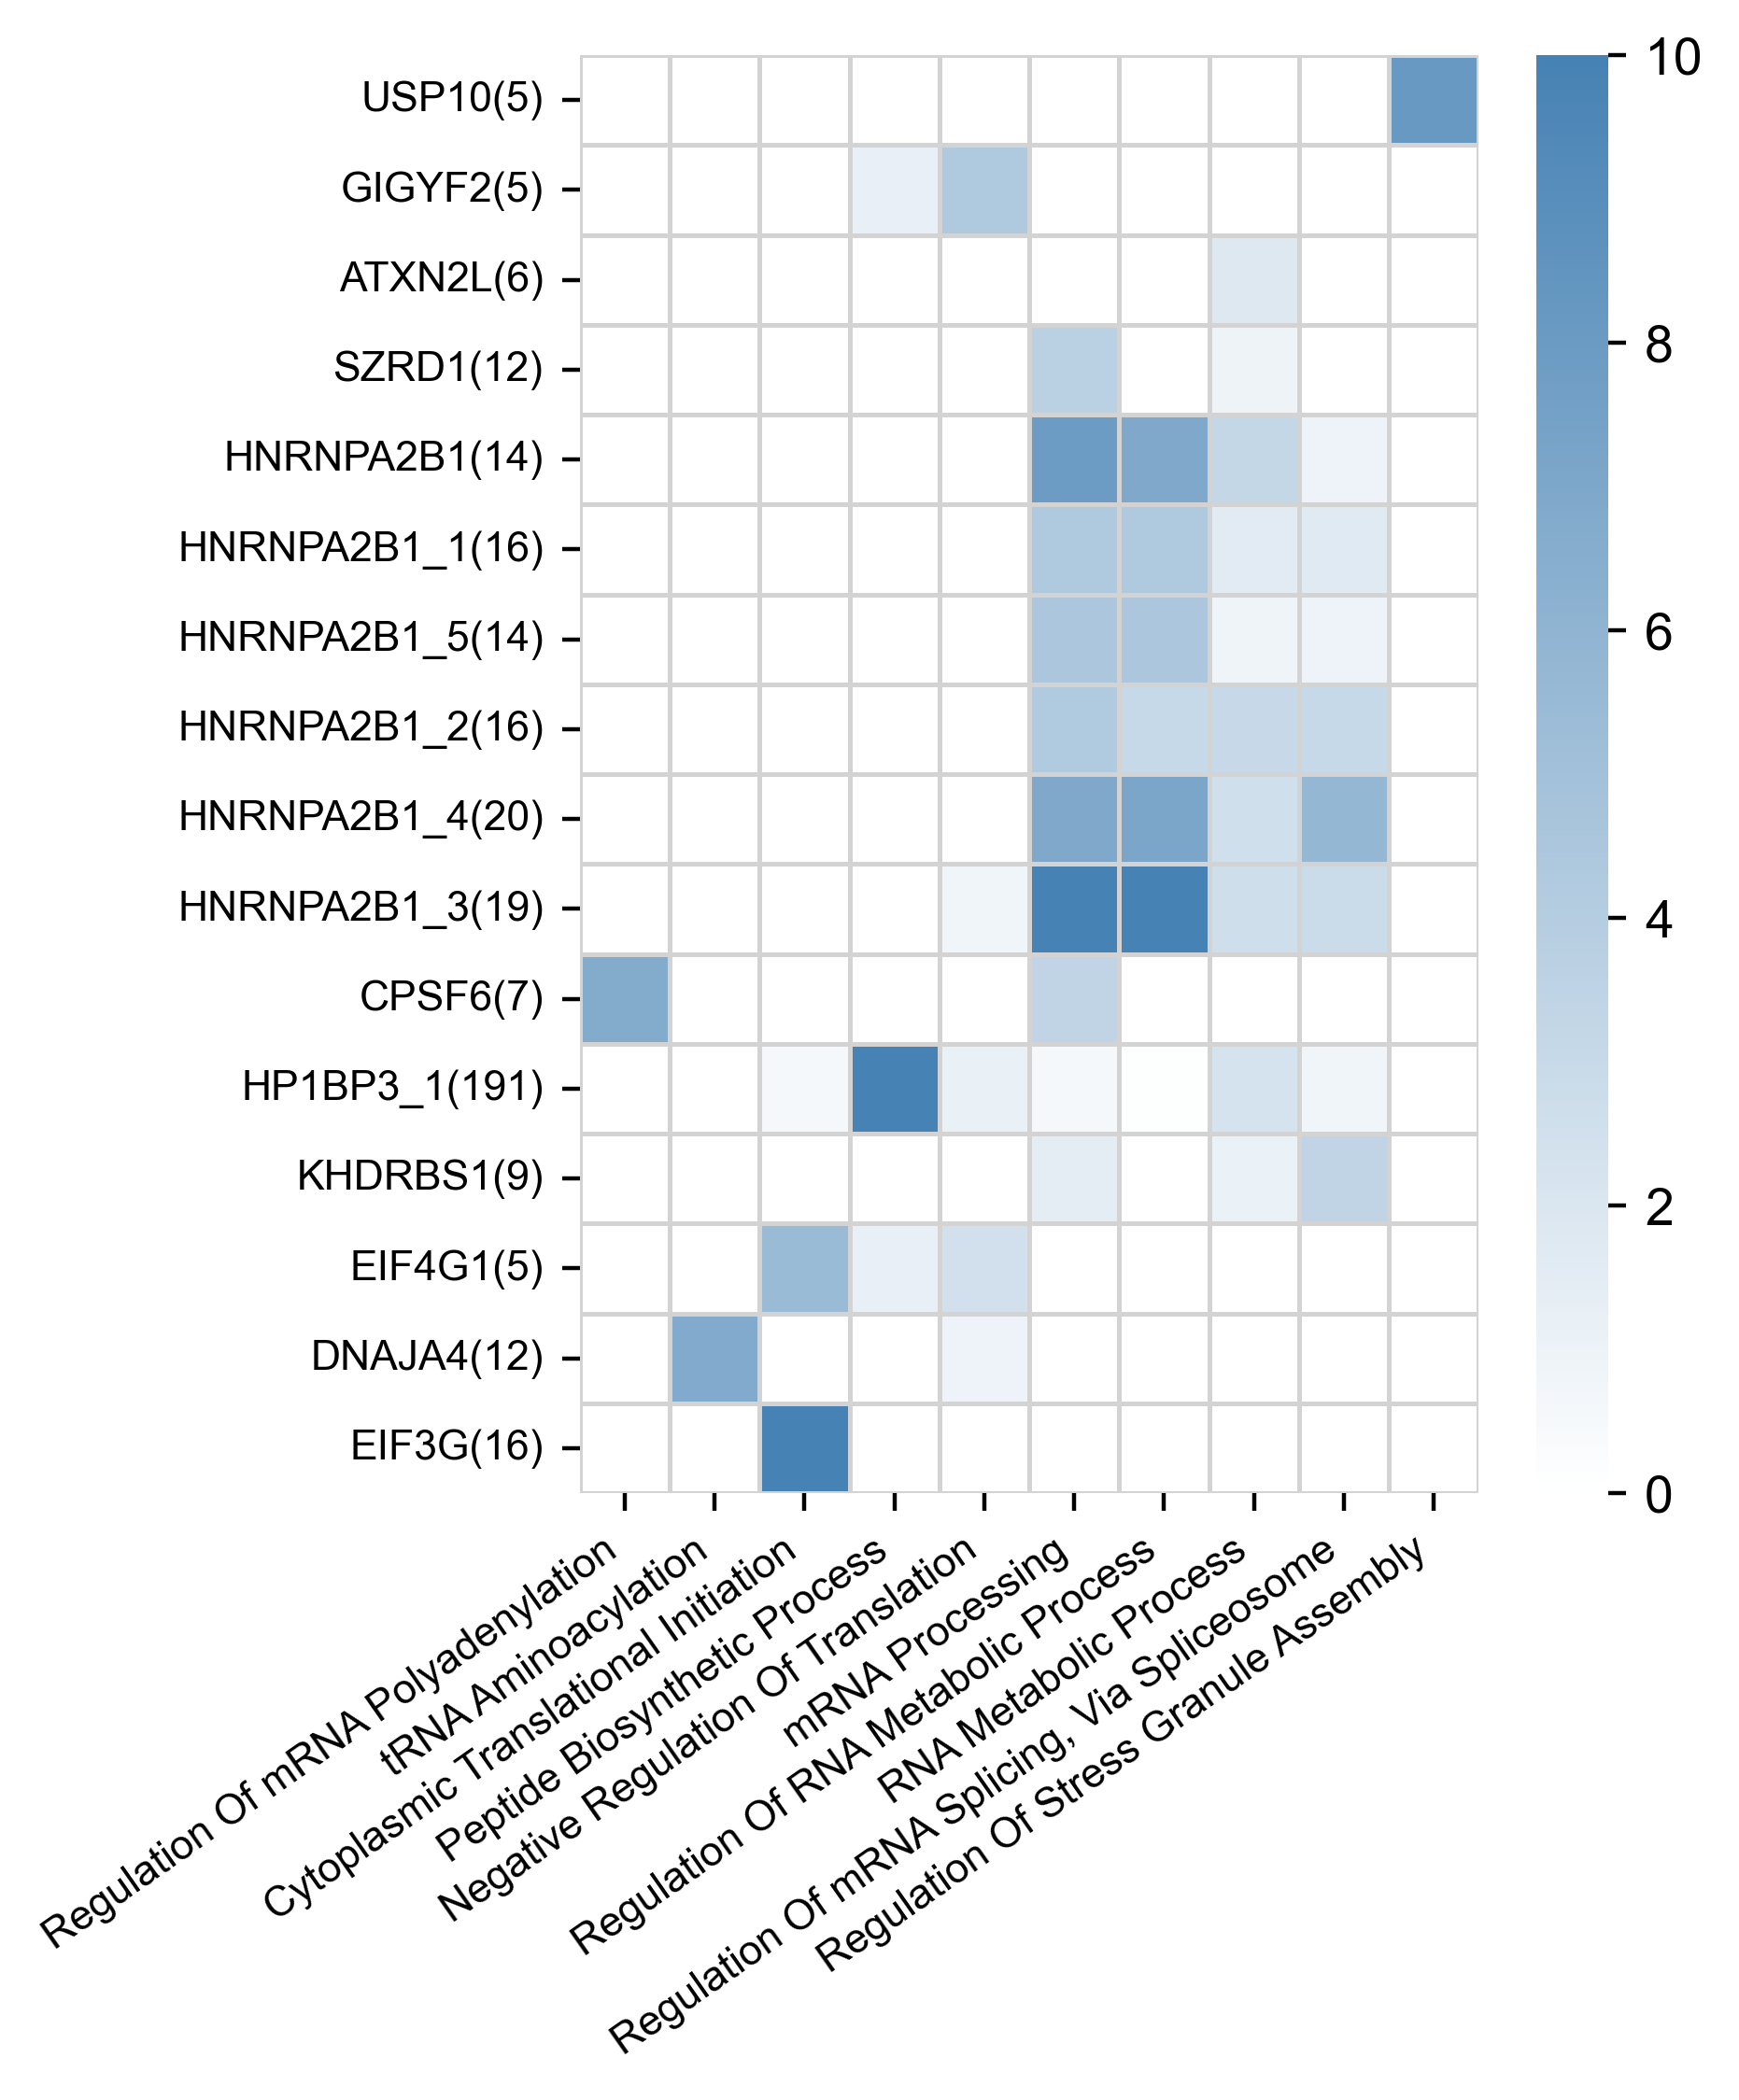

In [ ]:

my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "steelblue"])
plt.figure(figsize=(4, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(go_plot_df.fillna(0), cmap = my_colormap1, 
            vmin=0,vmax = 10, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')
